/tmp/ipykernel_21640/568648449.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Call Index'] = df.groupby('Iteration').cumcount()
/tmp/ipykernel_21640/568648449.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Call Index'] = df.groupby('Iteration').cumcount()


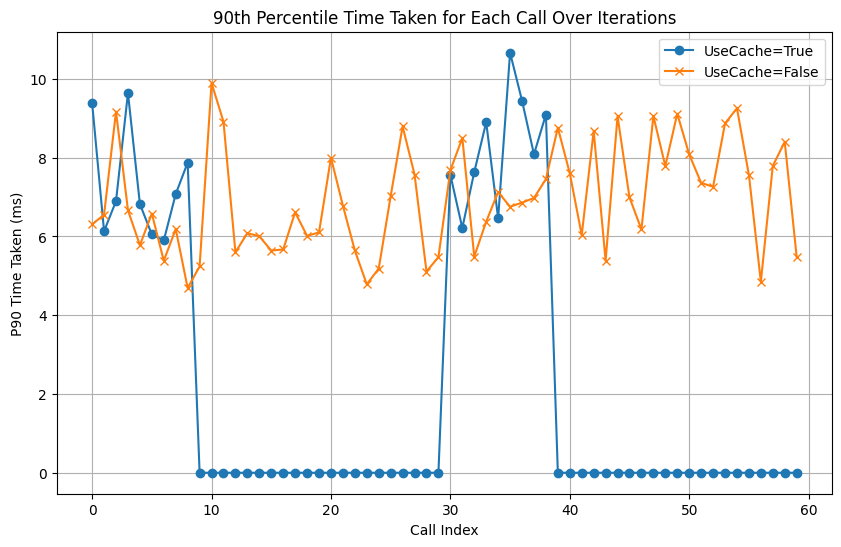

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("../results/results.csv")

# Convert UseCache to boolean type if it is not already
df['UseCache'] = df['UseCache'].astype('bool')

# Convert Time Taken from nanoseconds to milliseconds
df['Time Taken'] = df['Time Taken'] / 1_000_000

# Separate DataFrames based on UseCache
df_true = df[df['UseCache'] == True]
df_false = df[df['UseCache'] == False]

def process_data(df, percentile):
    # Create a call index within each iteration
    df['Call Index'] = df.groupby('Iteration').cumcount()
    
    # Pivot the table to have iterations as columns and call indices as rows
    pivot_df = df.pivot(index='Call Index', columns='Iteration', values='Time Taken')
    
    # Compute the specified percentile across the iterations (axis=1)
    p90_times = pivot_df.quantile(percentile, axis=1)
    
    # Convert it to DataFrame for ease of saving to CSV
    p90_df = p90_times.reset_index()
    p90_df.columns = ['Call Index', 'P90 Time Taken']

    return p90_df

# Specify the percentile
percentile = 0.90

# Process data for true and false UseCache values
p90_df_true = process_data(df_true, percentile)
p90_df_false = process_data(df_false, percentile)

# Save the 90th percentile times to new CSV files
p90_df_true.to_csv("../results/p90_true_milliseconds.csv", index=False)
p90_df_false.to_csv("../results/p90_false_milliseconds.csv", index=False)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(p90_df_true['Call Index'], p90_df_true['P90 Time Taken'], marker='o', linestyle='-', label='UseCache=True')
plt.plot(p90_df_false['Call Index'], p90_df_false['P90 Time Taken'], marker='x', linestyle='-', label='UseCache=False')

plt.xlabel('Call Index')
plt.ylabel('P90 Time Taken (ms)')
plt.title('90th Percentile Time Taken for Each Call Over Iterations')
plt.legend()
plt.grid(True)
plt.savefig("../results/p90_plot_overlay_milliseconds.png")
plt.show()
